In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [334]:
listeners = pd.read_csv('top10000.csv').set_index('name').groupby('name').max()

In [335]:
listeners.head()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
!!!,582026,646819,687341,727327,703180,643184,694400,493873,559781,623667,...,306868,320746,320782,304416,305283,304543,316856,341645,300673,323732
$hirak,941366,853482,791185,701165,691168,633299,630497,613165,582840,547761,...,492728,512109,481729,479993,471861,441576,1080347,1667376,1742443,1559354
$teven Cannon,228377,225192,231603,387318,314474,268201,241689,197831,168092,207196,...,209187,202684,212942,201254,206070,198539,185670,194305,215780,232247
$uicideboy$,3196900,3174160,3124661,3133101,3123677,3530396,3519696,3464506,3460106,3569254,...,6384728,6487962,6922370,6929143,6826198,7239669,7807202,8548254,9920579,9268562
&ME,372112,472695,532418,600980,586350,570630,630524,606101,649240,621279,...,500629,558260,752090,763591,629659,582489,583188,663396,608406,645156


In [336]:
large_cap=listeners.sort_values(listeners.columns[0],ascending=False).head(500)

In [337]:
large_cap_2019=listeners.sort_values(listeners.columns[0],ascending=False).head(500)
large_cap_2020=listeners.sort_values(listeners.columns[11],ascending=False).head(500)
large_cap_2021=listeners.sort_values(listeners.columns[23],ascending=False).head(500)
large_cap_2022=listeners.sort_values(listeners.columns[35],ascending=False).head(500)

In [338]:
large_cap_2020.index.difference(large_cap.index)

Index(['Afro Bros', 'Alec Benjamin', 'Ali Gatie', 'Andy Grammer',
       'Arizona Zervas', 'Astrid S', 'Aya Nakamura', 'Bea Miller',
       'Becky Hill', 'Billy Ray Cyrus', 'Black Sabbath', 'Blueface',
       'Bryce Vine', 'Burna Boy', 'C. Tangana', 'CHVRCHES',
       'Cage The Elephant', 'Cali Y El Dandee', 'Chelsea Cutler',
       'Christian Nodal', 'Dalex', 'Darell', 'Dave', 'Daya', 'Dermot Kennedy',
       'Doja Cat', 'Dímelo Flow', 'El Alfa', 'Greeicy', 'HRVY', 'ILLENIUM',
       'Jhay Cortez', 'Jhené Aiko', 'Jonas Brothers', 'Jorja Smith',
       'Kane Brown', 'LANY', 'Lenny Tavárez', 'Lizzo', 'Luke Bryan',
       'Luke Combs', 'Lunay', 'Mabel', 'Martin Solveig', 'Morgan Wallen',
       'Mustard', 'Noah Kahan', 'Oliver Heldens', 'Ozzy Osbourne',
       'PARTYNEXTDOOR', 'Pablo Alborán', 'PnB Rock', 'Quality Control',
       'Quinn XCII', 'ROSALÍA', 'Rauw Alejandro', 'Rex Orange County', 'Riton',
       'Ruel', 'SHAED', 'Sabrina Carpenter', 'Sandro Cavazza', 'Santana',
       'Sash

In [339]:
large_cap_2021.index.difference(large_cap_2020.index)

Index(['Aitana', 'Alex Rose', 'Angèle', 'Arijit Singh', 'Au/Ra', 'BANNERS',
       'BROCKHAMPTON', 'Blake Shelton', 'Bobby Helms', 'Brett Eldredge',
       'Busta Rhymes', 'BØRNS', 'Chris Stapleton', 'City Girls', 'Clairo',
       'Conan Gray', 'DJ Nelson', 'Danna Paola', 'Don Toliver', 'FINNEAS',
       'Feid', 'Gusttavo Lima', 'JP Saxe', 'Jack Harlow', 'Jaden',
       'Jowell & Randy', 'KHEA', 'Kacey Musgraves', 'Keith Urban',
       'Kendo Kaponi', 'Kodaline', 'Kylie Minogue', 'Lele Pons',
       'Leon Bridges', 'Lil Durk', 'Luísa Sonza', 'MGMT', 'MKTO', 'MNEK',
       'Melanie Martinez', 'Nelly Furtado', 'Norma Jean Martine', 'Ofenbach',
       'Pink Sweat$', 'RAYE', 'SAINt JHN', 'Sam Fischer', 'Super Yei', 'TWICE',
       'Tate McRae', 'Thalia', 'Topic', 'VIZE', 'Wallows', 'beabadoobee',
       'Ñengo Flow'],
      dtype='object', name='name')

In [340]:
large_cap_2022.index.difference(large_cap_2021.index)

Index(['$uicideboy$', 'A.R. Rahman', 'AJR', 'AURORA', 'Anderson .Paak',
       'Aventura', 'Bon Iver', 'Brent Faiyaz', 'C. Tangana', 'Calibre 50',
       'Carrie Underwood', 'Charli XCX', 'Dilsinho', 'Duki', 'Fuego',
       'G Herbo', 'Gera MX', 'Glass Animals', 'Gym Class Heroes',
       'Henrique & Juliano', 'JID', 'Jaymes Young', 'John Newman',
       'Joyner Lucas', 'Kali Uchis', 'Kungs', 'League of Legends',
       'Lord Huron', 'Los Ángeles Azules', 'MARINA', 'Maiara & Maraisa',
       'Marília Mendonça', 'Milky Chance', 'Moneybagg Yo', 'Ms. Lauryn Hill',
       'Måneskin', 'NEIKED', 'Nightcrawlers', 'Oliver Tree', 'PNAU',
       'Playboi Carti', 'Pritam', 'Purple Disco Machine', 'Rich Brian',
       'Riton', 'Ruth B.', 'Rvssian', 'Ski Mask The Slump God', 'Soulja Boy',
       'Steve Lacy', 'Stromae', 'Swedish House Mafia', 'The Walters',
       'Timbaland', 'Timmy Trumpet', 'Tion Wayne', 'Tom Grennan',
       'Travis Barker', 'Trueno', 'WILLOW', 'girl in red'],
      dtype='obje

In [341]:
len(large_cap.index.difference(large_cap_2020.index))

77

In [342]:
len(large_cap_2020.index.difference(large_cap_2021.index))

56

In [343]:
len(large_cap_2021.index.difference(large_cap_2022.index))

61

In [344]:
mid_cap=listeners.sort_values(listeners.columns[0],ascending=False).head(3000)[500:]
mid_cap_2020=listeners.sort_values(listeners.columns[11],ascending=False).head(3000)[500:]
mid_cap_2021=listeners.sort_values(listeners.columns[23],ascending=False).head(3000)[500:]
mid_cap_2022=listeners.sort_values(listeners.columns[35],ascending=False).head(3000)[500:]

In [345]:
small_cap=listeners.sort_values(listeners.columns[0],ascending=False).head(13000)[3000:]
small_cap_2020=listeners.sort_values(listeners.columns[11],ascending=False).head(13000)[3000:]
small_cap_2021=listeners.sort_values(listeners.columns[23],ascending=False).head(13000)[3000:]
small_cap_2022=listeners.sort_values(listeners.columns[35],ascending=False).head(13000)[3000:]

In [346]:
len(listeners)

10000

In [347]:
len(large_cap)
large_cap_total=(large_cap.iloc[:,0].sum())
large_cap.tail()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
Jowell & Randy,5400761,7038181,8664907,8011558,7485612,7004681,6666658,6359502,6131637,6013748,...,11872259,11547201,10989305,10839069,11080540,10316015,9767749,9625257,9430782,9167197
Iggy Azalea,5387444,5552325,5611308,6729743,6647443,7573902,7458591,8282781,7804771,7426486,...,8293497,8632335,9943283,9633246,9453772,9759043,9988398,9634205,9141903,8751751
MC Kekel,5384663,4870045,4269459,3518922,3068847,2992567,3290620,3158307,3336150,3153359,...,2022058,1607110,1624017,1508767,1486897,1399292,1506131,1476854,1360753,1369554
Peter Manos,5383946,5334839,4053711,2410638,1988224,1684140,1641116,1663171,1642930,1550968,...,1184132,1051752,1008851,1023228,894032,856762,808118,831086,858886,834603
Maná,5380800,5338744,5572339,5560619,6262710,6631626,6816898,6833964,7159205,7363542,...,8838543,9687339,9965157,9650092,9689129,9681056,9920586,10015647,10055972,10375860


In [348]:
len(mid_cap)
mid_cap_total=(mid_cap.iloc[:,0].sum())
mid_cap.tail()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
Monsieur Periné,957052,953391,980383,1000003,1017621,970408,957240,1052709,1091921,1092615,...,1405207,1485309,1440561,1412685,1383842,1343481,1386172,1368502,4242133,6090299
Metric,956966,987847,1067897,1077859,1053313,1106691,1135478,1139787,1162869,1169425,...,1549463,1637601,1706508,1725728,2596180,2352177,2177042,2107969,2086246,2534691
The Gregory Brothers,956934,846787,814794,801702,827465,750207,745916,771502,831636,839003,...,840275,851762,837911,831659,794521,739357,712361,676971,694391,680561
Mesto,956375,1126082,1222462,1642322,2178239,1727773,1764796,1701896,1638364,1931764,...,2156879,2042681,2035662,1939733,1870850,1740301,1898361,1785054,1733080,1714060
Ruelle,955610,1045616,1034529,1080103,1091734,1218584,1249895,1447938,1550696,1700300,...,2439488,2494567,2698116,2592275,2492076,2473155,2475516,2552038,2554938,2520001


In [349]:
len(small_cap)
small_cap_total=(small_cap.iloc[:,0].sum())
small_cap.tail()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
Kaiydo,199915,229682,236542,234948,209214,180158,182873,173516,168357,159051,...,130451,143139,145893,141650,137832,128976,121857,113256,113310,109005
Madison Ryann Ward,199911,201845,152951,143994,146878,147302,152758,227499,273371,261773,...,462620,482265,506956,530300,493932,501386,502921,596974,598194,677623
Ajebutter22,199902,190606,185787,235722,230229,240404,225454,231630,249005,254255,...,236837,244678,248085,251086,257417,274165,261625,255856,253530,262940
Evil Needle,199891,229313,208957,153124,140700,136083,266940,339044,301455,366896,...,203366,189061,174396,223483,257738,199627,188819,230473,234597,212604
Los Hispanos,199868,47617,34356,35101,36443,37789,39937,40244,43947,51141,...,80081,81844,79339,82787,92907,103609,120510,172929,206357,370407


In [350]:
small_cap_total/(small_cap_total+mid_cap_total+large_cap_total)

0.20119813406968817

In [351]:
mid_cap_total/(small_cap_total+mid_cap_total+large_cap_total)

0.34182925622049015

In [352]:
large_cap_total/(small_cap_total+mid_cap_total+large_cap_total)

0.4569726097098217

In [353]:
small_cap_total_2022=(small_cap_2022.iloc[:,0].sum())
mid_cap_total_2022=(mid_cap_2022.iloc[:,0].sum())
large_cap_total_2022=(large_cap_2022.iloc[:,0].sum())

In [354]:
small_cap_total_2022/(small_cap_total_2022+mid_cap_total_2022+large_cap_total_2022)

0.23624892933697358

In [355]:
mid_cap_total_2022/(small_cap_total_2022+mid_cap_total_2022+large_cap_total_2022)

0.3564000009706197

In [356]:
large_cap_total_2022/(small_cap_total_2022+mid_cap_total_2022+large_cap_total_2022)

0.40735106969240675

# streaming growth curve for each artist

Assumption 1:
All artist streams grow at the same rate g, per month
$$ E[s_i]=s_0 g^i $$

Assumption 2:
The price of an artists streams is the net present value of all cashflows, discounted at rate d
$$ p_0= \sum_{i >0} E[s_i] k \frac{1}{d^i} $$
where $k$ is the revenue per stream (0.38 cents per stream)

Assumption 3:
$d>g$

Imply assumption 4:
$$p_0=k \sum_{i >0} E[s_i]  \frac{1}{d^i} = k\sum_{i >0} s_0  \frac{g^i}{d^i} =  s_0  \frac{k}{1-\frac{g}{d}} = s_0 M $$
where $M$ is a multiplier of the current number of streams

It follows that
$$\frac{p_n}{p_0}=\frac{s_n}{s_0}$$
so the ratio in streams is the ratio in prices

In [357]:
listeners_ratio=listeners.copy()

In [358]:
listeners.head()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
!!!,582026,646819,687341,727327,703180,643184,694400,493873,559781,623667,...,306868,320746,320782,304416,305283,304543,316856,341645,300673,323732
$hirak,941366,853482,791185,701165,691168,633299,630497,613165,582840,547761,...,492728,512109,481729,479993,471861,441576,1080347,1667376,1742443,1559354
$teven Cannon,228377,225192,231603,387318,314474,268201,241689,197831,168092,207196,...,209187,202684,212942,201254,206070,198539,185670,194305,215780,232247
$uicideboy$,3196900,3174160,3124661,3133101,3123677,3530396,3519696,3464506,3460106,3569254,...,6384728,6487962,6922370,6929143,6826198,7239669,7807202,8548254,9920579,9268562
&ME,372112,472695,532418,600980,586350,570630,630524,606101,649240,621279,...,500629,558260,752090,763591,629659,582489,583188,663396,608406,645156


In [359]:
for col in listeners_ratio.columns:
    listeners_ratio[col]=listeners[col]/listeners[listeners.columns[0]]
    
listeners_monthly_ratio=listeners_ratio.copy()
for i in range(0,len(listeners.columns)-2):
    listeners_monthly_ratio[listeners.columns[i+1]]=listeners[listeners.columns[i+1]]/listeners[listeners.columns[i]]

In [360]:
condition=(listeners_monthly_ratio>0.5) #& (listeners_monthly_ratio<upper)

In [361]:
listeners_ratio_clean=listeners_ratio[condition].dropna()

In [362]:
listeners.head()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
!!!,582026,646819,687341,727327,703180,643184,694400,493873,559781,623667,...,306868,320746,320782,304416,305283,304543,316856,341645,300673,323732
$hirak,941366,853482,791185,701165,691168,633299,630497,613165,582840,547761,...,492728,512109,481729,479993,471861,441576,1080347,1667376,1742443,1559354
$teven Cannon,228377,225192,231603,387318,314474,268201,241689,197831,168092,207196,...,209187,202684,212942,201254,206070,198539,185670,194305,215780,232247
$uicideboy$,3196900,3174160,3124661,3133101,3123677,3530396,3519696,3464506,3460106,3569254,...,6384728,6487962,6922370,6929143,6826198,7239669,7807202,8548254,9920579,9268562
&ME,372112,472695,532418,600980,586350,570630,630524,606101,649240,621279,...,500629,558260,752090,763591,629659,582489,583188,663396,608406,645156


In [363]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [364]:
symbols=['VTHR']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2022, 1, 1)
df = yf.download(symbols, start=start, end=end)
prices=df['Adj Close']
prices.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    108.472176
2019-01-03    106.199066
2019-01-04    109.594460
2019-01-07    110.507530
2019-01-08    111.677361
Name: Adj Close, dtype: float64

In [365]:
stock_market=(prices/prices.iloc[0]).iloc[::30]

In [367]:
plt.rcParams['figure.figsize'] = [20, 10]

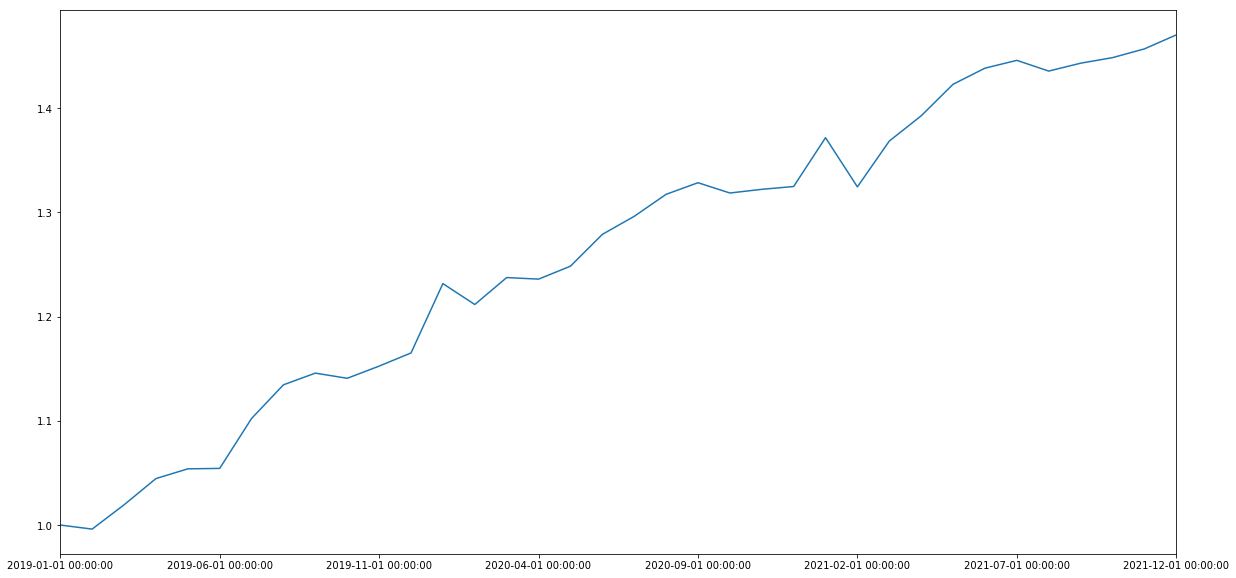

In [368]:
hey=listeners.sum()/listeners.sum().iloc[0]
hey.plot(label='All artists')

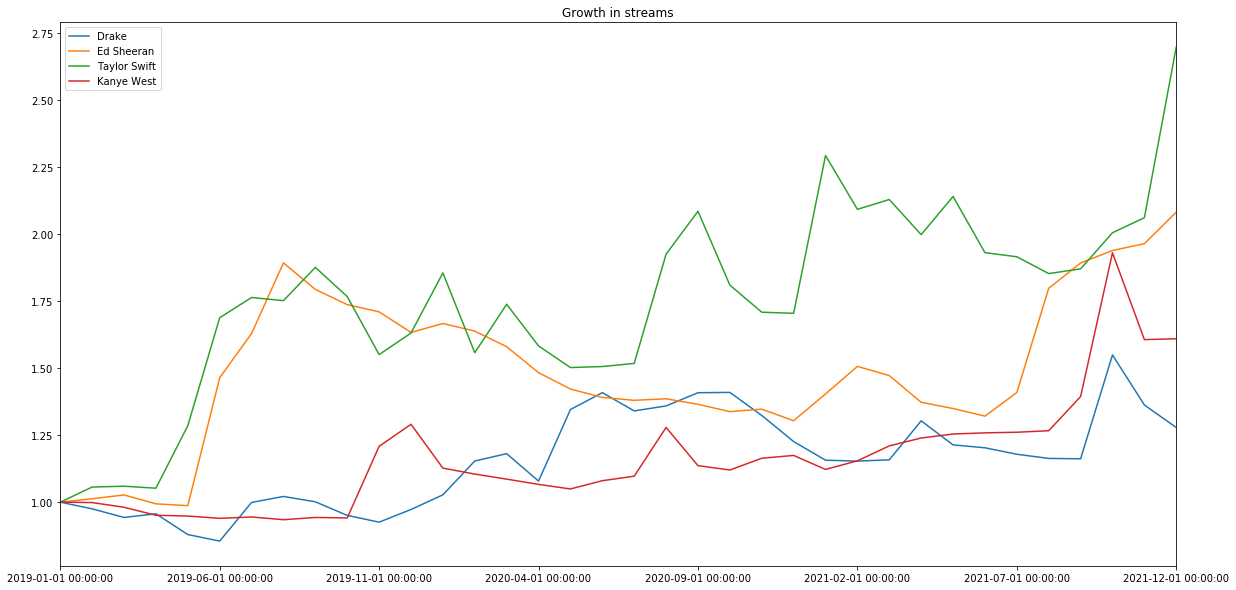

In [370]:
drake=listeners.loc['Drake']/listeners.loc['Drake'].iloc[0]
bobdylan=listeners.loc['Taylor Swift']/listeners.loc['Taylor Swift'].iloc[0]
olivia=listeners.loc['Kanye West']/listeners.loc['Kanye West'].iloc[0]
edsheeran=listeners.loc['Ed Sheeran']/listeners.loc['Ed Sheeran'].iloc[0]
drake.plot(label='Drake')
edsheeran.plot(label='Ed Sheeran')
bobdylan.plot(label='Taylor Swift')
olivia.plot(label='Kanye West')
#(prices/prices.iloc[0]).iloc[::30].plot(label='Russell 3000')
plt.title("Growth in streams")
plt.legend()

In [371]:
mid.head()

2019-01-01 00:00:00    1.000000
2019-02-01 00:00:00    1.022139
2019-03-01 00:00:00    1.052843
2019-04-01 00:00:00    1.095134
2019-05-01 00:00:00    1.112468
dtype: float64

500
2500
7000


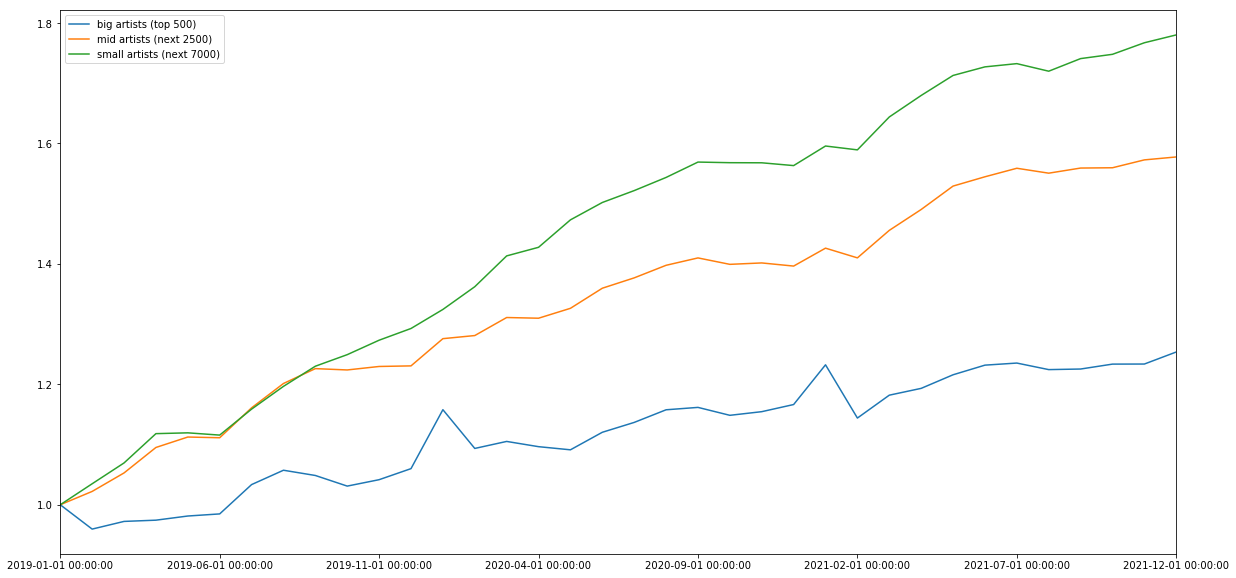

In [373]:
upper=large_cap
print(len(upper))
upper=upper.sum()
upper=upper/upper.iloc[0]
upper.plot(label='big artists (top 500)')
mid=mid_cap
print(len(mid))
mid=mid.sum()
mid=mid/mid.iloc[0]
mid.plot(label='mid artists (next 2500)')
low=small_cap
print(len(low))
low=low.sum()
low=low/low.iloc[0]
low.plot(label='small artists (next 7000)')
plt.legend()